In [1]:
import yaml
from pprint import pprint
from xmlpathology.xmlbatchgenerator.auxiliary import WSIPatchGenerator
from tqdm.notebook import tqdm
from tensorflow.keras.models import load_model
from sklearn.neighbors import DistanceMetric
import tensorflow.keras as K
from matplotlib import pyplot as plt
import numpy as np
import math
import time
from xmlpathology.io.imagereader import ImageReader

def blockshaped(arr, nrows, ncols):
    """
    Return an array of shape (n, nrows, ncols) where
    n * nrows * ncols = arr.size

    If arr is a 2D array, the returned array should look like n subblocks with
    each subblock preserving the "physical" layout of arr.
    """
    h, w, c = arr.shape
    return (arr.reshape(h//nrows, nrows, -1, ncols, c)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols, c))


def apply(model, data_sources, patch_shape=(256,256,3), spacing=0.5, tile_shape=(1024,1024), shift=1024, cpus=1, log_path=None):
    
    batchgen = WSIPatchGenerator(data_sources=data_sources,
                                 batch_size=1,
                                 patch_shape=tile_shape,
                                 shift=shift,
                                 cpus=cpus,
                                 spacing=spacing,
                                 log_path=log_path)
    support_set = np.load('/home/mart/Radboudumc/data/lymphocytes/1079_CD3_artifact_support.npy')
    support_encodings = model.predict_on_batch(support_set)
    batchgen.start()
    
    for image_annotation in batchgen().datasets['training'].image_annotations:
        ratio = image_annotation.get_ratio(spacing)
        for annotation in tqdm(image_annotation.annotations):
            batch = batchgen.batch('training')
            tile = batch[0][0][0][0]
            patches = blockshaped(tile, patch_shape[0], patch_shape[1])
            print(patches.shape)
            predictions = model.predict_on_batch(patches)
            print(predictions.shape)
            distance_metric = DistanceMetric.get_metric('euclidean')
            print(predictions.shape)
            d = distance_metric.pairwise(X=predictions, Y=support_encodings)
            d = (d < 14).astype('uint8')
            print(d)
            break


In [2]:
# #Data setup
# data_sources_path = '/home/mart/Radboudumc/data/lymphocytes/lymphocytes.yml'
# with open(data_sources_path) as f:
#     data_sources = yaml.load(f, yaml.FullLoader)
# print('data sources:')
data_sources = {'training': [{'image_path': '/home/mart/Radboudumc/data/lymphocytes/1079_CD3.mrxs', 'annotation_path': '/home/mart/Radboudumc/data/lymphocytes/1079_CD3.mrxs'}]}
pprint(data_sources)
label_map={'dot':1}

{'training': [{'annotation_path': '/home/mart/Radboudumc/data/lymphocytes/1079_CD3.mrxs',
               'image_path': '/home/mart/Radboudumc/data/lymphocytes/1079_CD3.mrxs'}]}


In [3]:
# setup model

model = load_model('/home/mart/Radboudumc/data/4taskencoder/supervsied_enc_2019_4tasks.h5', compile=False)
spacing = 2.0
cpus = 6
tile_shape = (1024, 1024)
shift = 1024
patch_shape = (64, 64)
batch_size = 1

In [2]:
# apply(model=model, data_sources= data_sources, patch_shape=patch_shape, spacing=spacing, tile_shape=tile_shape, shift=shift, cpus=1)

In [55]:
# batchgen.stop()

In [11]:
64*16

1024

In [8]:
reshape_value = 1024/64
scale_value = 64

16.0

In [14]:
a= np.zeros((16,16))

In [15]:
a[5][5] = 1

In [19]:
64*64

4096

In [ ]:
import time

In [22]:
t1 = time.time()
a.repeat(64,0).repeat(64,1).shape
t2 = time.time()
print(t2-t1)

0.003224611282348633


In [2]:
all_patches = []

for image_annotation in batchgen().datasets['training'].image_annotations:
    ratio = image_annotation.get_ratio(spacing)
    xs = np.array(range(0, tile_size, patch_shape[0]))
    ys = np.array(range(0, tile_size, patch_shape[1]))
    
    for annotation in tqdm(image_annotation.annotations):
        batch = batchgen.batch('training')
        patch = batch[0][0][0][0]
        patches = blockshaped(patch, patch_shape[0], patch_shape[1])
        patch_index = 0
                p = patches[patch_index]
                x_start = int(x*ratio) + (annotation.center[0] - int(tile_size*ratio) // 2)
                x_end = x_start + int(block_shape*ratio)
                y_start = int(y*ratio) + (annotation.center[1]  - int(tile_size*ratio) // 2)
                y_end = y_start + int(block_shape*ratio)
                patch_index += 1


IndentationError: unexpected indent (<ipython-input-2-52f74e794710>, line 13)

In [ ]:
plt.imshow(patches[129])
plt.show()

In [ ]:
range(-patch_shape[0]//2, patch_shape[0]//2, 64)

In [2]:
import numpy as np
from matplotlib import pyplot as plt 

In [62]:
support_set = np.load('/home/mart/Radboudumc/data/lymphocytes/1079_CD3_artifact_support.npy')

In [63]:
support_set.shape

(1, 64, 64, 3)

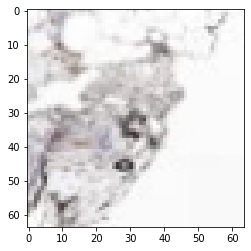

In [64]:
plt.imshow(support_set[0])
plt.show()

In [34]:
a = np.zeros(16)

In [35]:
a[5] =1

In [36]:
b= a

In [37]:
b.shape

(16,)

In [39]:
b = np.kron(b, np.ones((4)))

In [42]:
b.reshape(8,8)

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [67]:
6580/1024
# 2967


6.42578125

In [68]:
6143+1024

7167

In [70]:
from xmlpathology.xmlbatchgenerator.auxiliary import WSIPatchGenerator

In [3]:
model_path = '/home/mart/Radboudumc/data/4taskencoder/supervsied_enc_2019_4tasks.h5'
image_path = '/home/mart/Radboudumc/data/lymphocytes/1079_CD3.mrxs'
support_path = '/home/mart/Radboudumc/data/lymphocytes/1079_CD3_artifact_support.npy'
mask_path = None
# Init batchgenerator
data_sources = {'training': [{'image_path': image_path,
                           'annotation_path': image_path, 
                           'mask_path': mask_path}]}

batchgen = WSIPatchGenerator(data_sources=data_sources,
                             batch_size=1,
                             patch_shape=(1024, 1024),
                             shift=1024,
                             cpus=1,
                             spacing=8.0,
                             log_path='/home/mart/testwsibatcgen/')
batchgen.start()

batch generator started (single-core)


In [5]:
batch = batchgen.batch('training')

In [6]:
patches, masks, weights = batch

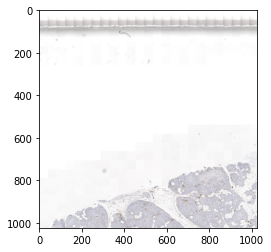

In [7]:
plt.imshow(patches[0][0][0])
plt.show()

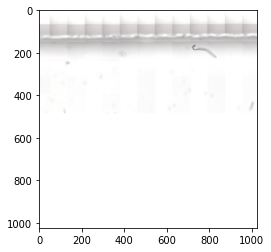

In [6]:
plt.imshow(patches[0][0][0])
plt.show()

In [31]:
np.save('/home/mart/fsdtest/exactsupport', np.array([patches[0][0][0][:64,:64,:]]))

In [14]:
patches[:][0][0].shape

(1, 1024, 1024, 3)

In [7]:
batchgen.stop()

In [22]:
patches[:][0][0][:64][:64][:].shape

(1, 1024, 1024, 3)

In [30]:
np.array([patches[0][0][0][:64,:64,:]]).shape

(1, 64, 64, 3)

In [3]:
batchgen().datasets['training'].image_annotations[0].annotations[-1].bounds

(5120.0, 12288.0, 6144.0, 13312.0)

In [4]:
batchgen().datasets['training'].image_annotations[0].annotations[-1].bounds

(2048.0, 6144.0, 3072.0, 7168.0)